# IMPORTING PACKAGES, IMPORTING DATASET AS DATAFRAME FROM GOOGLE DRIVE

# Machine Learning Warriors Team 6 D

In [ ]:
#Importing of python packages 
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
#mount google drive on google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the csv dataset into the colab enviroment as a dataframe
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Challenge6csv.csv')

# print head of the dataset
dataframe.head()

,open/CLOSED,Type,No,Original Date Received HE/IDT,Date Received by the Project,CIP\nTarget (w/d),CIP 1st\nDeadline,CIP 7\nTarget\n(working days),CIP 2nd\nDeadline,HE 10 Target (working days),HE 10 Deadline,DATE CLOSED (Public/official),Number_Working_Days_to_Close,Reason for Contact,TREND,Completed within CIP 5 Target?,Completed within CIP 7 Target?,Completed within HE 10 Target?
0,Closed,Project Email,20011901,2019-01-20 00:00:00,2019-01-20 00:00:00,5,2019-01-25 00:00:00,7,2019-01-29 00:00:00,10,2019-02-01 00:00:00,2019-02-01 00:00:00,10,Complaint,Diversion - Routes,NO,NO,YES
1,Closed,Project Email,21011906,2019-01-21 00:00:00,2019-01-21 00:00:00,5,2019-01-28 00:00:00,7,2019-01-30 00:00:00,10,2019-02-04 00:00:00,2019-01-28 00:00:00,6,Complaint,Roadworks,YES,YES,YES
2,Closed,CCC Email,18973623,2019-01-22 00:00:00,2019-01-22 00:00:00,5,2019-01-29 00:00:00,7,2019-01-31 00:00:00,10,2019-02-05 00:00:00,2019-01-29 00:00:00,6,Complaint,Diversion - Signage,YES,YES,YES
3,Closed,Project Email,23011901,2019-01-23 00:00:00,2019-01-23 00:00:00,5,2019-01-30 00:00:00,7,2019-02-01 00:00:00,10,2019-02-06 00:00:00,2019-01-30 00:00:00,6,Enquiry,Scheme Design,YES,YES,YES
4,Closed,CCC Phone,18976864,2019-01-23 00:00:00,2019-01-23 00:00:00,5,2019-01-30 00:00:00,7,2019-02-01 00:00:00,10,2019-02-06 00:00:00,2019-01-30 00:00:00,6,Complaint,Diversion - Routes,YES,YES,YES


# EXPLORATORY DATA ANALYSIS OF THE DATASET

In [ ]:
# find duplicate data in the dataframe
dataframe.loc[dataframe.duplicated(), :]

,open/CLOSED,Type,No,Original Date Received HE/IDT,Date Received by the Project,CIP\nTarget (w/d),CIP 1st\nDeadline,CIP 7\nTarget\n(working days),CIP 2nd\nDeadline,HE 10 Target (working days),HE 10 Deadline,DATE CLOSED (Public/official),Number_Working_Days_to_Close,Reason for Contact,TREND,Completed within CIP 5 Target?,Completed within CIP 7 Target?,Completed within HE 10 Target?
1161,Closed,FOI/EIR,100325,2019-09-12 00:00:00,2019-09-12 00:00:00,20,2019-10-10 00:00:00,20,2019-10-10 00:00:00,20,2019-10-10 00:00:00,2019-11-25 00:00:00,53,Enquiry,Air Quality,NO,NO,NO


In [ ]:
# drop duplicate rows in the dataframe
dataframe.drop_duplicates(keep = False, inplace = True)

In [ ]:
# explore data types in the data frame
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4228 entries, 0 to 4229
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   open/CLOSED                      4228 non-null   object
 1   Type                             4228 non-null   object
 2   No                               4228 non-null   object
 3   Original Date Received HE/IDT    4228 non-null   object
 4   Date Received by the Project     4228 non-null   object
 5   CIP
Target (w/d)                 4228 non-null   int64 
 6   CIP 1st
Deadline                 4228 non-null   object
 7   CIP 7
Target
(working days)      4228 non-null   int64 
 8   CIP 2nd
Deadline                 4228 non-null   object
 9   HE 10 Target (working days)      4228 non-null   int64 
 10  HE 10 Deadline                   4228 non-null   object
 11  DATE CLOSED (Public/official)    4228 non-null   object
 12  Number_Working_Days_to_Close     4

In [ ]:
#find unique values in the Type column
dataframe['Type'].unique()

array(['Project Email', 'CCC Email', 'CCC Phone', 'FOI/EIR', 'MP Direct',
       'CEO', 'S1 COMPLAINT', 'S2 COMPLAINT', 'TO', 'S3 COMPLAINT', 'MC',
       'M Briefing', 'PQ'], dtype=object)

In [ ]:
#find unique values in the reason for contact variable
dataframe['Reason for Contact'].unique()

array(['Complaint', 'Enquiry', 'Criticism', 'Compliment'], dtype=object)

In [ ]:
# find unique values in the trend variable
dataframe.TREND.unique()

array(['Diversion - Routes ', 'Roadworks', 'Diversion - Signage',
       'Scheme Design', 'A14 Motorway', 'Noise - General', 'Flooding',
       'Construction Traffic', 'Workforce', 'Other', 'Traffic Management',
       'Request', 'Speed Restrictions/Narrow Lanes', 'Closures',
       'Noise - Night', 'Air Quality ', 'Mud On Road', 'Land',
       'Presentation Request', 'Traffic Modelling ', 'Project Update',
       'Environment', 'Cost', 'Postitive Feedback', 'Red Claim',
       'Mobile Visitor Centre', 'Job', 'Archaeology', 'Works'],
      dtype=object)

#Change the datatype of some colums to datetime columns

In [ ]:
# change the datype of some colums to datetime variables

# change the Original Date Received HE/IDT column to datetime variable
dataframe['Original Date Received HE/IDT'] = pd.to_datetime(dataframe['Original Date Received HE/IDT']) 
# change the Date Received by the Project column to datetime variable
dataframe['Date Received by the Project'] = pd.to_datetime(dataframe['Date Received by the Project']) 

dataframe['Date Received by the Project'] = pd.to_datetime(dataframe['Date Received by the Project']) 

# change the CIP 1st\nDeadline column to datetime variable
dataframe['CIP 1st\nDeadline'] = pd.to_datetime(dataframe['CIP 1st\nDeadline']) 

# change the CIP 2nd\nDeadline column to datetime variable
dataframe['CIP 2nd\nDeadline'] = pd.to_datetime(dataframe['CIP 2nd\nDeadline'])
# change the DATE CLOSED (Public/official) column to datetime variable
dataframe['DATE CLOSED (Public/official)'] = pd.to_datetime(dataframe['DATE CLOSED (Public/official)'])


#Formation of new columns/variables in the dataframe

In [ ]:
#difference between date sent and date received by project team
dataframe['Difference_Original_Received'] = (dataframe['Date Received by the Project'] - dataframe['Original Date Received HE/IDT']).dt.days

# difference between date recieved by the project team and the first deadline
dataframe['first_days_deadline']=(dataframe['CIP 1st\nDeadline']-dataframe['Date Received by the Project']).dt.days

# difference between date recieved by the project team and the second deadline
dataframe['second_days_deadline']=(dataframe['CIP 2nd\nDeadline']-dataframe['Date Received by the Project']).dt.days

# difference between date recieved by the project team and the public and official deadline
dataframe['third_days_deadline']=(dataframe['DATE CLOSED (Public/official)']-dataframe['Date Received by the Project']).dt.days

In [ ]:
#print the head of the new dataframe
dataframe.head()

,open/CLOSED,Type,No,Original Date Received HE/IDT,Date Received by the Project,CIP\nTarget (w/d),CIP 1st\nDeadline,CIP 7\nTarget\n(working days),CIP 2nd\nDeadline,HE 10 Target (working days),HE 10 Deadline,DATE CLOSED (Public/official),Number_Working_Days_to_Close,Reason for Contact,TREND,Completed within CIP 5 Target?,Completed within CIP 7 Target?,Completed within HE 10 Target?,Difference_Original_Received,first_days_deadline,second_days_deadline,third_days_deadline
0,Closed,Project Email,20011901,2019-01-20,2019-01-20,5,2019-01-25,7,2019-01-29,10,2019-02-01 00:00:00,2019-02-01,10,Complaint,Diversion - Routes,NO,NO,YES,0,5,9,12
1,Closed,Project Email,21011906,2019-01-21,2019-01-21,5,2019-01-28,7,2019-01-30,10,2019-02-04 00:00:00,2019-01-28,6,Complaint,Roadworks,YES,YES,YES,0,7,9,7
2,Closed,CCC Email,18973623,2019-01-22,2019-01-22,5,2019-01-29,7,2019-01-31,10,2019-02-05 00:00:00,2019-01-29,6,Complaint,Diversion - Signage,YES,YES,YES,0,7,9,7
3,Closed,Project Email,23011901,2019-01-23,2019-01-23,5,2019-01-30,7,2019-02-01,10,2019-02-06 00:00:00,2019-01-30,6,Enquiry,Scheme Design,YES,YES,YES,0,7,9,7
4,Closed,CCC Phone,18976864,2019-01-23,2019-01-23,5,2019-01-30,7,2019-02-01,10,2019-02-06 00:00:00,2019-01-30,6,Complaint,Diversion - Routes,YES,YES,YES,0,7,9,7


In [ ]:
# print dataframe columns names 
dataframe.columns

Index(['open/CLOSED', 'Type', 'No', 'Original Date Received HE/IDT',
       'Date Received by the Project', 'CIP\nTarget (w/d)',
       'CIP 1st\nDeadline', 'CIP 7\nTarget\n(working days)',
       'CIP 2nd\nDeadline', 'HE 10 Target (working days)', 'HE 10 Deadline',
       'DATE CLOSED (Public/official)', 'Number_Working_Days_to_Close',
       'Reason for Contact', 'TREND', 'Completed within CIP 5 Target?',
       'Completed within CIP 7 Target?', ' Completed within HE 10 Target?',
       'Difference_Original_Received', 'first_days_deadline',
       'second_days_deadline', 'third_days_deadline'],
      dtype='object')

In [ ]:
# drop irrelevant columns in the dataframe
dataframe_new = dataframe[["Number_Working_Days_to_Close","Type", "Difference_Original_Received","Reason for Contact","TREND","first_days_deadline","second_days_deadline","third_days_deadline"]]

In [ ]:
# print the head of the new data
dataframe_new.head()

,Number_Working_Days_to_Close,Type,Difference_Original_Received,Reason for Contact,TREND,first_days_deadline,second_days_deadline,third_days_deadline
0,10,Project Email,0,Complaint,Diversion - Routes,5,9,12
1,6,Project Email,0,Complaint,Roadworks,7,9,7
2,6,CCC Email,0,Complaint,Diversion - Signage,7,9,7
3,6,Project Email,0,Enquiry,Scheme Design,7,9,7
4,6,CCC Phone,0,Complaint,Diversion - Routes,7,9,7


In [ ]:
# prit new dataframe info
dataframe_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4228 entries, 0 to 4229
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Number_Working_Days_to_Close  4228 non-null   int64 
 1   Type                          4228 non-null   object
 2   Difference_Original_Received  4228 non-null   int64 
 3   Reason for Contact            4228 non-null   object
 4   TREND                         4228 non-null   object
 5   first_days_deadline           4228 non-null   int64 
 6   second_days_deadline          4228 non-null   int64 
 7   third_days_deadline           4228 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 297.3+ KB


In [ ]:
# drop some irrelevant rows in the dataframe
i = dataframe_new[(dataframe_new["Type"]=='TO')|(dataframe_new["Type"]=='MC')|(dataframe_new["Type"]=='CEO')|(dataframe_new["Type"]=='FOI/EIR')|
              (dataframe_new["Type"]=='M Briefing')|(dataframe_new["Type"]=='pq')].index

dataframe_new = dataframe_new.drop(i)

In [ ]:
#check for missing cells in the dataframe
dataframe_new.isna().sum()

Number_Working_Days_to_Close    0
Type                            0
Difference_Original_Received    0
Reason for Contact              0
TREND                           0
first_days_deadline             0
second_days_deadline            0
third_days_deadline             0
dtype: int64

In [ ]:
# checking dataframe information
dataframe_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4140 entries, 0 to 4229
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Number_Working_Days_to_Close  4140 non-null   int64 
 1   Type                          4140 non-null   object
 2   Difference_Original_Received  4140 non-null   int64 
 3   Reason for Contact            4140 non-null   object
 4   TREND                         4140 non-null   object
 5   first_days_deadline           4140 non-null   int64 
 6   second_days_deadline          4140 non-null   int64 
 7   third_days_deadline           4140 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 291.1+ KB


In [ ]:
# Regroup the various trends in the trend columns into four categories which are Construction purpose (CP), Plannning Purpose(PP), Enviromental issues(EI) and General Issues(G)
A={"Diversion - Routes ": "CP", "Roadworks": "CP","Diversion - Signage": "CP","Traffic Management": "CP","Construction Traffic": "CP","Speed Restrictions/Narrow Lanes": "CP", "Closures": "CP", "Works":"CP",
 "Scheme Design": "PP", "A14 Motorway": "PP","Traffic Modelling ": "PP",
 "Noise - General": "EI", "Flooding": "EI","Noise - Night": "EI","Air Quality ": "EI","Mud On Road": "EI","Land": "EI", "Environment": "EI","Archaeology": "EI",
 "Request": "G", "Presentation Request": "G","Workforce": "G","Postitive Feedback": "G","Other": "G","Job": "G", "Mobile Visitor Centre": "G","Red Claim": "G", "Project Update": "G","Cost": "G"}

dataframe_new['Trend_type']=dataframe_new["TREND"].replace(A)

# Regroup the various types in the types columns into two categories; indirect and direct
dataframe_new['Type_code']=dataframe_new["Type"].replace({"Project Email": "Direct", "CCC Email": "Indirect","CCC Phone": "Indirect","S1 COMPLAINT": "Indirect",
                                                           "S2 COMPLAINT": "Indirect","S3 COMPLAINT": "Indirect", "PQ": "Indirect", "MP Direct":"Indirect"})
# print dataframe
dataframe_new.head()

,Number_Working_Days_to_Close,Type,Difference_Original_Received,Reason for Contact,TREND,first_days_deadline,second_days_deadline,third_days_deadline,Trend_type,Type_code
0,10,Project Email,0,Complaint,Diversion - Routes,5,9,12,CP,Direct
1,6,Project Email,0,Complaint,Roadworks,7,9,7,CP,Direct
2,6,CCC Email,0,Complaint,Diversion - Signage,7,9,7,CP,Indirect
3,6,Project Email,0,Enquiry,Scheme Design,7,9,7,PP,Direct
4,6,CCC Phone,0,Complaint,Diversion - Routes,7,9,7,CP,Indirect


#Graphs to explore the distribution of different variables in the dataset. This is to extract patterns in the dataframe

count    4228.000000
mean        7.627483
std         6.650565
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        73.000000
Name: Number_Working_Days_to_Close, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


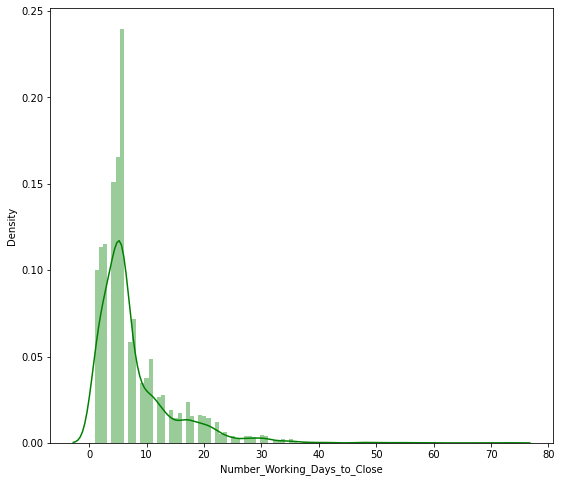

In [ ]:
# inspect the distribution of the dependent variable:Number_Working_Days_to_Close
print(dataframe['Number_Working_Days_to_Close'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dataframe['Number_Working_Days_to_Close'], color='g', bins=100, hist_kws={'alpha': 0.4});

Text(0.5, 0, 'Types of contact')

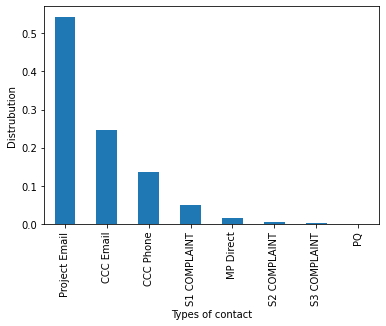

In [ ]:
#plot to check the distribution of contact types
dataframe_new.Type.value_counts(normalize = True).plot.bar()
plt.ylabel("Distrubution")
plt.xlabel("Types of contact")

Text(0.5, 0, 'Reason for Contact')

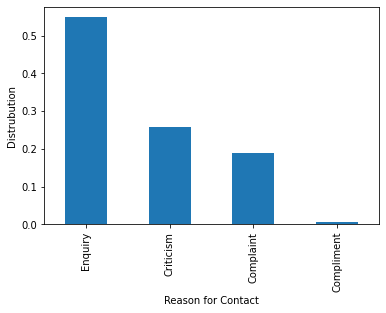

In [ ]:
#plot to check the distribution of reasons for contact
dataframe_new['Reason for Contact'].value_counts(normalize = True).plot.bar()
plt.ylabel("Distrubution")
plt.xlabel("Reason for Contact")

Text(0.5, 0, 'Trend Category')

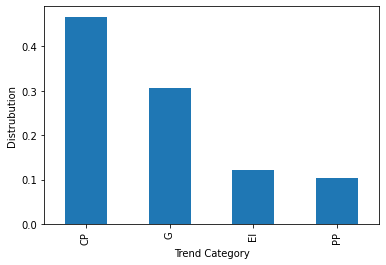

In [ ]:
#plot to check the distribution of contact types
dataframe_new.Trend_type.value_counts(normalize = True).plot.bar()
plt.ylabel("Distrubution")
plt.xlabel("Trend Category")

# Graphs to explore the average number of working days to close a case with respect to different variables 

Text(0, 0.5, 'Average number of working days to close')

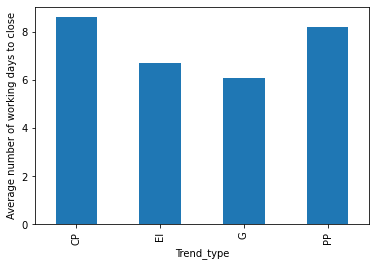

In [ ]:
# average number of working hours for different contact types
dataframe_new.groupby(['Trend_type']).mean()['Number_Working_Days_to_Close'].plot.bar()
plt.ylabel("Average number of working days to close")

Text(0, 0.5, 'Average number of working days to close')

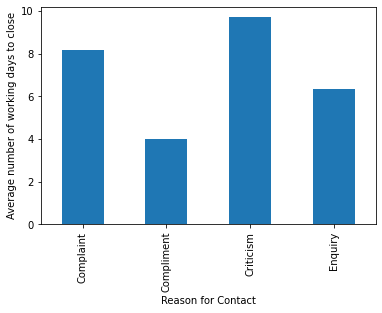

In [ ]:
#average number of working hours for different reasons for compliants 
dataframe_new.groupby(['Reason for Contact']).mean()['Number_Working_Days_to_Close'].plot.bar()
plt.ylabel("Average number of working days to close")

Text(0, 0.5, 'Average number of working days to close')

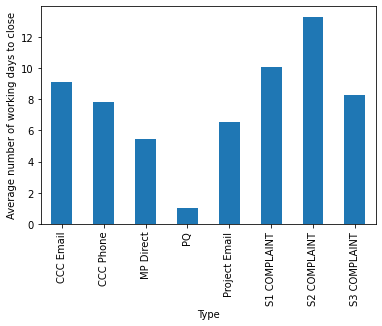

In [ ]:
# Average number of working hours for different contact types
dataframe_new.groupby(['Type']).mean()['Number_Working_Days_to_Close'].plot.bar()
plt.ylabel("Average number of working days to close")

In [ ]:
# replacing the type code variable with 0 and 1
dataframe_new['Type_code']=dataframe_new["Type_code"].replace({"Direct":1, "Indirect": 0})

# replacing the reasons for contact variable with 1, 2, 3 and 4
dataframe_new['Reason for Contact']=dataframe_new["Reason for Contact"].replace({"Compliment":1, "Enquiry": 2,"Criticism": 3,"Complaint": 4 })

dataframe_new.head()

,Number_Working_Days_to_Close,Type,Difference_Original_Received,Reason for Contact,TREND,first_days_deadline,second_days_deadline,third_days_deadline,Trend_type,Type_code
0,10,Project Email,0,4,Diversion - Routes,5,9,12,CP,1
1,6,Project Email,0,4,Roadworks,7,9,7,CP,1
2,6,CCC Email,0,4,Diversion - Signage,7,9,7,CP,0
3,6,Project Email,0,2,Scheme Design,7,9,7,PP,1
4,6,CCC Phone,0,4,Diversion - Routes,7,9,7,CP,0


In [ ]:
#Dropping irrelevant columns that will not be used in building our ML models
dataframe_new_1 = dataframe_new.drop(['TREND','Type'], axis=1)
dataframe_new_1.head()

# creating dummy variables 
dataframe_new_2 = pd.get_dummies(dataframe_new_1, drop_first=True )
dataframe_new_2.head()

,Number_Working_Days_to_Close,Difference_Original_Received,Reason for Contact,first_days_deadline,second_days_deadline,third_days_deadline,Type_code,Trend_type_EI,Trend_type_G,Trend_type_PP
0,10,0,4,5,9,12,1,0,0,0
1,6,0,4,7,9,7,1,0,0,0
2,6,0,4,7,9,7,0,0,0,0
3,6,0,2,7,9,7,1,0,0,1
4,6,0,4,7,9,7,0,0,0,0


In [ ]:
# creating prediction variables 
X=dataframe_new_2.drop(['Number_Working_Days_to_Close'],axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4140 entries, 0 to 4229
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Difference_Original_Received  4140 non-null   int64
 1   Reason for Contact            4140 non-null   int64
 2   first_days_deadline           4140 non-null   int64
 3   second_days_deadline          4140 non-null   int64
 4   third_days_deadline           4140 non-null   int64
 5   Type_code                     4140 non-null   int64
 6   Trend_type_EI                 4140 non-null   uint8
 7   Trend_type_G                  4140 non-null   uint8
 8   Trend_type_PP                 4140 non-null   uint8
dtypes: int64(6), uint8(3)
memory usage: 238.5 KB


In [ ]:
# predictor variable head
X.head()

,Difference_Original_Received,Reason for Contact,first_days_deadline,second_days_deadline,third_days_deadline,Type_code,Trend_type_EI,Trend_type_G,Trend_type_PP
0,0,4,5,9,12,1,0,0,0
1,0,4,7,9,7,1,0,0,0
2,0,4,7,9,7,0,0,0,0
3,0,2,7,9,7,1,0,0,1
4,0,4,7,9,7,0,0,0,0


# Preparing data for machine learning modeling

In [ ]:
from sklearn.preprocessing import StandardScaler
# Creating an instance of the sklearn.preprocessing.MinMaxScaler()
scaler = StandardScaler()

In [ ]:
# standardizing the numeric vaiables/columns. This will help improve our model performance
X[["Difference_Original_Received"]] = scaler.fit_transform(X[["Difference_Original_Received"]])

X[["Reason for Contact"]] = scaler.fit_transform(X[["Reason for Contact"]])

X[["first_days_deadline"]] = scaler.fit_transform(X[["first_days_deadline"]])

X[["second_days_deadline"]] = scaler.fit_transform(X[["second_days_deadline"]])

X[["third_days_deadline"]] = scaler.fit_transform(X[["third_days_deadline"]])

y_data = dataframe_new_2.Number_Working_Days_to_Close

In [ ]:
X.head()

,Difference_Original_Received,Reason for Contact,first_days_deadline,second_days_deadline,third_days_deadline,Type_code,Trend_type_EI,Trend_type_G,Trend_type_PP
0,-0.222256,1.738075,-0.313233,-0.040688,0.341462,1,0,0,0
1,-0.222256,1.738075,0.223294,-0.040688,-0.179604,1,0,0,0
2,-0.222256,1.738075,0.223294,-0.040688,-0.179604,0,0,0,0
3,-0.222256,-0.800066,0.223294,-0.040688,-0.179604,1,0,0,1
4,-0.222256,1.738075,0.223294,-0.040688,-0.179604,0,0,0,0


In [ ]:
y_data[1:5]

1    6
2    6
3    6
4    6
Name: Number_Working_Days_to_Close, dtype: int64

In [ ]:
#splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size = 0.2)

In [ ]:
#head of data
X_train.head()

,Difference_Original_Received,Reason for Contact,first_days_deadline,second_days_deadline,third_days_deadline,Type_code,Trend_type_EI,Trend_type_G,Trend_type_PP
2514,0.052823,0.469004,-0.044970,0.220471,-0.909098,0,0,0,0
1775,-0.222256,0.469004,0.223294,0.481629,-0.283818,0,0,0,0
4098,-0.222256,-0.800066,0.223294,-0.040688,-0.804885,1,1,0,0
3723,-0.222256,0.469004,0.223294,-0.040688,-0.179604,1,0,1,0
2558,0.052823,0.469004,-0.044970,-0.301846,2.946797,0,0,0,0


In [ ]:
y_test[1:5]

3945     1
3614     6
3910     6
329     10
Name: Number_Working_Days_to_Close, dtype: int64

# Multiple Linear Regression Model

In [ ]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score
import sklearn.metrics as sm
from sklearn import model_selection

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
yhat = regr.predict(X_test)
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, yhat), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, yhat), 2))  
print("R2 score =", round(sm.r2_score(y_test, yhat), 2))


Mean absolute error = 0.51
Mean squared error = 0.47
R2 score = 0.99


# Xgboost Regression model 

In [ ]:
import xgboost
from numpy import absolute
from xgboost import XGBRegressor

model=XGBRegressor(n_estimators=3000, max_depth=10, eta=0.1, subsample=0.7, colsample_bytree=0.8)

model.fit(X_train,y_train)

yhat = model.predict(X_test)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, yhat), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, yhat), 2))  
print("R2 score =", round(sm.r2_score(y_test, yhat), 2))

[08:21:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean absolute error = 0.29
Mean squared error = 0.48
R2 score = 0.99


# SVM Regression model

In [ ]:
from sklearn.svm import SVR
model = SVR(C=1.0, epsilon=0.2)
model.fit(X_train, y_train)
yhat_1 = model.predict(X_test)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, yhat_1), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, yhat_1), 2))  
print("R2 score =", round(sm.r2_score(y_test, yhat_1), 2))

Mean absolute error = 0.59
Mean squared error = 1.73
R2 score = 0.96


# Neural Network Regression

In [ ]:
input_size=2
output_size=1
models = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size)
                            ])
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
models.compile(optimizer=custom_optimizer,loss='mean_squared_error')
models.fit(X_train,y_train,epochs=300,verbose=1)
yhat_2 = models.predict(X_test)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, yhat_2), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, yhat_2), 2))  
print("R2 score =", round(sm.r2_score(y_test, yhat_2), 2))

Epoch 1/300
104/104 [==============================] - 1s 2ms/step - loss: 12.9187
Epoch 2/300
104/104 [==============================] - 0s 2ms/step - loss: 0.9554
Epoch 3/300
104/104 [==============================] - 0s 2ms/step - loss: 0.6826
Epoch 4/300
104/104 [==============================] - 0s 2ms/step - loss: 0.5847
Epoch 5/300
104/104 [==============================] - 0s 2ms/step - loss: 0.5454
Epoch 6/300
104/104 [==============================] - 0s 2ms/step - loss: 0.5280
Epoch 7/300
104/104 [==============================] - 0s 2ms/step - loss: 0.5180
Epoch 8/300
104/104 [==============================] - 0s 2ms/step - loss: 0.5140
Epoch 9/300
104/104 [==============================] - 0s 2ms/step - loss: 0.5071
Epoch 10/300
104/104 [==============================] - 0s 2ms/step - loss: 0.5047
Epoch 11/300
104/104 [==============================] - 0s 2ms/step - loss: 0.5012
Epoch 12/300
104/104 [==============================] - 0s 1ms/step - loss: 0.5035
Epoch 13/300